<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#scipy-modules-are-imported-individually" data-toc-modified-id="scipy-modules-are-imported-individually-0.0.0.1">scipy modules are imported individually</a></span></li></ul></li></ul></li><li><span><a href="#scipy.stats" data-toc-modified-id="scipy.stats-0.1">scipy.stats</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#interpolate" data-toc-modified-id="interpolate-0.1.0.1">interpolate</a></span></li><li><span><a href="#optimize:" data-toc-modified-id="optimize:-0.1.0.2">optimize:</a></span></li><li><span><a href="#stats" data-toc-modified-id="stats-0.1.0.3">stats</a></span></li></ul></li></ul></li><li><span><a href="#Practice---2-minutes" data-toc-modified-id="Practice---2-minutes-0.2">Practice - 2 minutes</a></span></li><li><span><a href="#Review-scipy-documentation" data-toc-modified-id="Review-scipy-documentation-0.3">Review scipy documentation</a></span></li></ul></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-1">Exercise 2</a></span></li></ul></div>

**Scipy**

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

Scipy can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab’s toolboxes. scipy is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.
Before implementing a routine, it is worth checking if the desired data processing is not already implemented in Scipy. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, Scipy’s routines are optimized and tested, and should therefore be used when possible.

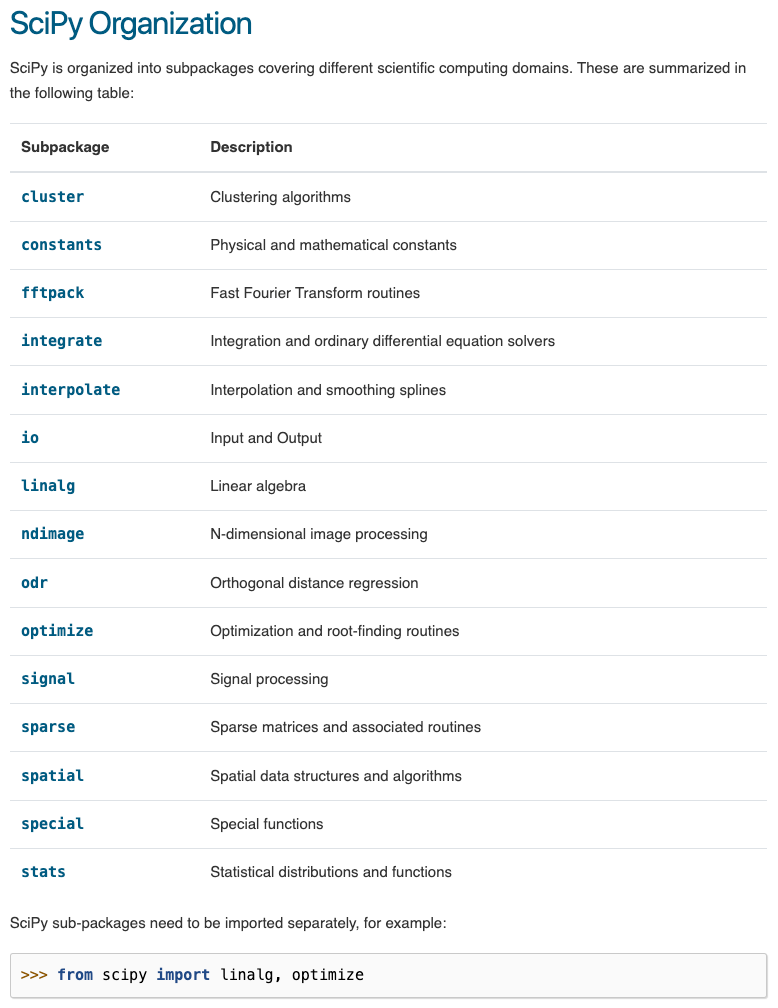

#### scipy modules are imported individually

In [ ]:
# This will not work.

import scipy
print(constants.Avogadro)

In [ ]:
from scipy import constants
print(constants.Avogadro)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize
import pandas as pd

## scipy.stats

This module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

Statistics is a very large area, and there are topics that are out of scope for SciPy and are covered by other packages. Some of the most important ones are:

#### interpolate
- a method for generating points between given points.

In [ ]:
# The function interp1d() is used to interpolate a distribution with 1 variable.
# It takes x and y points and **returns a callable function** that can be called with 
# new x and returns corresponding y.

# For given x and y interpolate values from 2.1, 2.2... to 2.9:

x = np.arange(10)
y = 2*x + 1

call_func = interp1d(x, y)     # returns a callable function interp_funct

z = call_func(np.arange(2.1, 3, 0.1))

print(x)
print(' ')
print(y)
print(' ')
print(call_func)
print(' ')
print(z)

In [ ]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

linear_interp = interp1d(measured_time, measures)

interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)
linear_results

In [ ]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)
cubic_results

In [ ]:
# Plot the data and the interpolation
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

#### optimize:  
- a set of procedures defined in SciPy that either find the minimum value of a function, or the root of an equation.

In [ ]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

#### stats

In [ ]:
# Sample from a normal distribution using numpy's random number generator
samples = np.random.normal(size=10000)

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

In [ ]:
# Probability density function

#Given observations of a random process, their histogram is an estimator of the 
# random process’s PDF (probability density function):

samples = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

histogram = np.histogram(samples, bins=bins, density=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

from scipy import stats
pdf = stats.norm.pdf(bins)  # norm is a distribution object

plt.plot(bins, histogram) 

plt.plot(bins, pdf)

In [ ]:
a = [65,23,45,67,83,12,67,90,43,22,56,65,67,76]
b = np.array([[10,20,30], [40,50,60]])
np.median(a)

In [ ]:
stats.scoreatpercentile(a, 50)

In [ ]:
stats.scoreatpercentile(samples, 90) 

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the means of two sets of observations are significantly different:

- One sample t-test: 
    - **ttest_1samp**  
    - Compare a random sample mean to the known population mean.  
- Two sample t-test: 
    - **ttest_ind**    
    - Compare the means of two independent groups.                
- Paired t-test:     
    - **ttest_ind**    
    - Compare the means of two variables (repeated measurements)                         


The T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
The p value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.head()

In [ ]:
np.mean(df['bp_before'])

In [ ]:
stats.ttest_1samp(df['bp_before'],np.mean(df['bp_before']))  

# stats.ttest_1samp(df['bp_before'],0 )

In [ ]:
 stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],                 
                 df['bp_after'][df['sex'] == 'Female'])
    
# This could have been done as follows:
# Male_bp_before = df[df['sex'] == 'Male']['bp_before']
# Female_bp_before = df[df['sex'] == 'Feale']['bp_before']
# stats.ttest_ind(Male_bp_before, Female_bp_before)

# The p value obtained from the t-test is significant (p < 0.05)
# There is a statistically significant difference in the average post blood pressure between males and 
# females, t= 3.3480, p= 0.001.

In [ ]:
stats.ttest_ind(df['bp_before'], df['bp_after'])

## Practice - 2 minutes

- A plot of vaccines distributed and administered is provided below.
- Is the difference in the means of the 2 columns statitically significant?

In [ ]:
vac_distributed = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
vac_administered = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, vac_distributed, 'ro')
plt.plot(months, vac_administered, 'bo')
plt.xlabel('Month')
plt.ylabel('Vaccines Distributed & Administered')

In [69]:
# Exercise Solution



Ttest_indResult(statistic=10.97184688722018, pvalue=2.175972509181154e-10)

## Review scipy documentation

https://scipy.github.io/devdocs/tutorial/general.html

# Exercise 2